In [2]:
import pandas as pd

# read data
data = pd.read_csv("../datasets/data_clean.csv")

In [3]:
import re

relationship = {}
rela = data["participant_relationship"]

# iterate over relationships
for item in rela:
    # check if item is not NaN
    if pd.isna(item) == False:
        # split item on |
        item = re.split("[|]+", item)
        # iterate over splitted item
        for element in item:
            # replace :: with : because of weird thing in dataset
            element = element.replace("::", ":")
            # remove number and : from element
            element = element.split(':')[-1]
            # record in dictionary how often relationship occurs
            if element in relationship:
                relationship[element] += 1
            else:
                relationship[element] = 1
            
for item in relationship:
    print(item, relationship[item])

Family 3551
Friends 1091
Significant others - current or former 3465
Armed Robbery 7964
Neighbor 726
Home Invasion - Perp Does Not Know Victim 1374
Home Invasion - Perp Knows Victim 525
Aquaintance 1019
Gang vs Gang 587
Drive by - Random victims 43
Co-worker 139
Mass shooting - Perp Knows Victims 12
Mass shooting - Random victims 8


In [4]:
import math

# log every item in amount of relationships
for item in relationship:
    relationship[item] = math.log10(relationship[item])
    
data = {'Relationships': relationship}

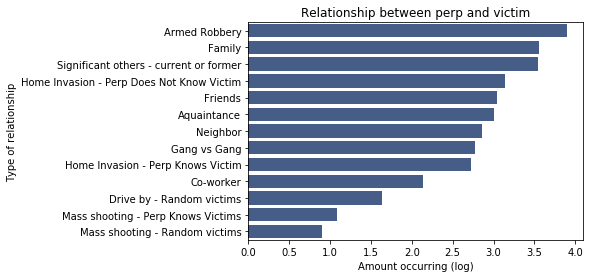

In [6]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# plot the data
df_data = pd.DataFrame(data).sort_values('Relationships', ascending=False)
fig = sns.barplot(x='Relationships', y=df_data.index, data=df_data, color=sns.xkcd_rgb["denim blue"])
plt.xlabel('Amount occurring (log)')
plt.ylabel('Type of relationship')
plt.title('Relationship between perp and victim')
plt.show(fig)

In [91]:
# counts the number of occurrances of relationship types per year

data = pd.read_csv("../datasets/data_clean.csv")

participant_relationship = data["participant_relationship"]
date = data["date"]

rela_2014 = {}
rela_2015 = {}
rela_2016 = {}
rela_2017 = {}
rela_2018 = {}
rela_per_year = {'2014': rela_2014, '2015': rela_2015, '2016': rela_2016, '2017': rela_2017, '2018': rela_2018}
relationship_types = []

# print(date[1][:4])
# dictaa = rela_per_year[date[1][:4]]
# dictaa['Family'] = 1
# print(rela_per_year)
# print(dictaa)

# iterate over length of data
for i in range(len(data)):
    # check if item is not NaN
    item = participant_relationship[i]
    if pd.isna(item) == False: 
        item = re.split("[|]+", item)
        # iterate over splitted item
        for element in item:
            # replace :: with : because of weird thing in dataset
            element = element.replace("::", ":")
            # remove number and : from element
            element = element.split(':')[-1]
            # add item to count of the correct year
            dicto = rela_per_year[date[i][:4]]
            if element in dicto:
                dicto[element] += 1
            else:
                dicto[element] = 1
                # add item to list op relationship types if it isn't yet
                if element not in relationship_types:
                    relationship_types.append(element)

In [92]:
# gives missing relationship types per year value 0

# iterate over items in all relationship types
for item in relationship_types:
    # iterate over years
    for year in rela_per_year.values():
        # set value to 0 if type doesn't exist yet
        if item not in year:
            year[item] = 0

In [93]:
# print the number of occurrances of relationship types per year

year = 2014

# iterate over items in relationships
for item in rela_per_year.values():
    print()
    print(year)
    year += 1
    # iterate over elements in relationship and print the name and value
    for element in item:
        print(element, item[element])
        


2014
Family 257
Friends 119
Significant others - current or former 90
Armed Robbery 291
Neighbor 14
Home Invasion - Perp Does Not Know Victim 106
Home Invasion - Perp Knows Victim 51
Aquaintance 26
Gang vs Gang 34
Drive by - Random victims 4
Co-worker 2
Mass shooting - Perp Knows Victims 0
Mass shooting - Random victims 0

2015
Friends 446
Family 1102
Armed Robbery 2294
Significant others - current or former 759
Home Invasion - Perp Does Not Know Victim 504
Gang vs Gang 209
Home Invasion - Perp Knows Victim 189
Mass shooting - Perp Knows Victims 4
Drive by - Random victims 23
Mass shooting - Random victims 3
Aquaintance 38
Neighbor 179
Co-worker 32

2016
Family 1054
Gang vs Gang 161
Armed Robbery 2975
Friends 292
Neighbor 287
Significant others - current or former 1205
Home Invasion - Perp Does Not Know Victim 447
Home Invasion - Perp Knows Victim 154
Aquaintance 423
Co-worker 50
Mass shooting - Perp Knows Victims 3
Drive by - Random victims 3
Mass shooting - Random victims 1

2017
Si

In [113]:
# adds the data for the plot in the correct format

data = {'years' : ['2014','2015','2016','2017','2018']}
top_6 = ['Armed Robbery','Family','Significant others - current or former','Home Invasion - Perp Does Not Know Victim','Friends','Gang vs Gang','Other']
values = []
# iterate over relationship types
for item in relationship_types:
    # check if item in top 6 relationship types
    if item in top_6:
        data[item] = []
        # iterate over years and add value of relationship type to list
        for element in rela_per_year:
            data[item].append(rela_per_year[element][item])
        values += data[item]
        
other = []
            
# iterate over years
for element in rela_per_year:
    total = 0
    # iterate over relationship types of year
    for item in rela_per_year[element]:
        # add value to total for that year and add to list
        if item not in top_6:
            total += rela_per_year[element][item]
    other.append(total)
    
values += other
print(values)
        
data['Other'] = other

print(data)

[257, 1102, 1054, 947, 191, 119, 446, 292, 197, 37, 90, 759, 1205, 1139, 272, 291, 2294, 2975, 2083, 321, 106, 504, 447, 249, 68, 34, 209, 161, 144, 39, 97, 468, 921, 835, 151]
{'years': ['2014', '2015', '2016', '2017', '2018'], 'Family': [257, 1102, 1054, 947, 191], 'Friends': [119, 446, 292, 197, 37], 'Significant others - current or former': [90, 759, 1205, 1139, 272], 'Armed Robbery': [291, 2294, 2975, 2083, 321], 'Home Invasion - Perp Does Not Know Victim': [106, 504, 447, 249, 68], 'Gang vs Gang': [34, 209, 161, 144, 39], 'Other': [97, 468, 921, 835, 151]}


In [114]:


from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure, output_notebook
from bokeh.palettes import viridis
import seaborn as sns
from bokeh.resources import CDN
from bokeh.embed import file_html

output_notebook()
years = ['2014','2015','2016','2017','2018']
types = top_6
colors = viridis(7)
p = figure(x_range=years, plot_height=600, plot_width=900, title="Relationship Type per Incident per Year",
           toolbar_location=None, tools="", y_range=(0,10000))

p.vbar_stack(types, x='years', width=0.9, color=colors, source=data,
             legend=[value(x) for x in types])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number of Incidents"

show(p)
html = file_html(p, CDN, "my plot")
print(html)


Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: fruits [renderer: GlyphRenderer(id='40ed29e0-9f6e-454c-801a-f4d7e08e28d3', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: fruits [renderer: GlyphRenderer(id='662ac5dd-6e42-410d-9052-c301e874abb0', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: fruits [renderer: GlyphRenderer(id='8c597cab-9498-4196-b075-446b5fb29508', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: fruits [renderer: GlyphRenderer(id='a1008305-8859-4b6c-965a-ec972e77a285', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: fruits [renderer: GlyphRenderer(id='a8526809-c5cb-4dc1-8746-3b6be9e1b505', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent co


<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <title>my plot</title>
        
<link rel="stylesheet" href="https://cdn.pydata.org/bokeh/release/bokeh-0.12.16.min.css" type="text/css" />
        
<script type="text/javascript" src="https://cdn.pydata.org/bokeh/release/bokeh-0.12.16.min.js"></script>
<script type="text/javascript">
    Bokeh.set_log_level("info");
</script>
    </head>
    <body>
        
        <div class="bk-root">
            <div class="bk-plotdiv" id="9ede0c12-51e6-4b33-a3c6-3f1a325d04b2"></div>
        </div>
        
        <script type="application/json" id="e09491cc-c2e4-4bbc-af6b-658ed4801445">
          {"c9ba05e4-437a-4376-85ef-a2f152748f3f":{"roots":{"references":[{"attributes":{},"id":"16809c35-4f2e-4c58-84bd-64341cef266e","type":"Selection"},{"attributes":{"bottom":{"expr":{"id":"298605cb-5d2f-456a-a5bc-fc6c34b0b73e","type":"Stack"}},"fill_color":{"value":"#FDE724"},"line_color":{"value":"#FDE724"},"top":{"expr":{"id

In [109]:
print(data)

{'years': ['2014', '2015', '2016', '2017', '2018'], 'Family': [257, 1102, 1054, 947, 191], 'Friends': [119, 446, 292, 197, 37], 'Significant others - current or former': [90, 759, 1205, 1139, 272], 'Armed Robbery': [291, 2294, 2975, 2083, 321], 'Home Invasion - Perp Does Not Know Victim': [106, 504, 447, 249, 68], 'Gang vs Gang': [34, 209, 161, 144, 39], 'Other': [97, 468, 921, 835, 151]}


In [110]:
joe = pd.read_csv("../datasets/data_clean.csv")


incidents = {}

for i in range(len(joe)):
    item = joe["participant_relationship"][i]
    if pd.isna(item) == False:
        item = re.split("[|]+", item)
        # iterate over new elements
        for element in item:
            # remove number and : from element
            element = element.split(':')[-1]
            if element != "Unknown":
                if joe["date"][i][:4] in incidents:
                    incidents[joe["date"][i][:4]] += 1
                else:
                    incidents[joe["date"][i][:4]] = 1
    
totals = []
for item in incidents:
    totals.append(incidents[item])
    
print(totals)

[994, 5782, 7055, 5594, 1079]


In [111]:
print(len(data))

for item in data:
    if item != 'years':
        for i in range(len(totals)):
            data[item][i] = data[item][i] / totals[i]
            
print(data)

8
{'years': ['2014', '2015', '2016', '2017', '2018'], 'Family': [0.25855130784708247, 0.1905914908336216, 0.1493975903614458, 0.1692885234179478, 0.17701575532900835], 'Friends': [0.11971830985915492, 0.07713593912141127, 0.04138908575478384, 0.03521630318198069, 0.03429101019462465], 'Significant others - current or former': [0.09054325955734406, 0.1312694569353165, 0.1708008504606662, 0.2036110117983554, 0.2520852641334569], 'Armed Robbery': [0.29275653923541245, 0.39674852992044274, 0.42168674698795183, 0.37236324633535933, 0.2974976830398517], 'Home Invasion - Perp Does Not Know Victim': [0.10663983903420524, 0.08716707021791767, 0.06335931963146704, 0.04451197711834108, 0.06302131603336422], 'Gang vs Gang': [0.03420523138832998, 0.03614666205465237, 0.02282069454287739, 0.025741866285305684, 0.03614457831325301], 'Other': [0.09758551307847083, 0.08094085091663784, 0.13054571226080794, 0.14926707186271004, 0.13994439295644115]}


In [112]:
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure, output_notebook
from bokeh.palettes import viridis
import seaborn as sns

output_notebook()
years = ['2014','2015','2016','2017','2018']
types = top_6
colors = viridis(7)
p = figure(x_range=years, plot_height=600, plot_width=700, title="Relationship Type per Incident per Year",
           toolbar_location=None, tools="", y_range=(0,1.7))

p.vbar_stack(types, x='years', width=0.98, color=colors, source=data,
             legend=[value(x) for x in types])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number of Incidents"

show(p)

Loading BokehJS ...